图像增广在对训练图像进行一系列的随机变化之后，生成相似但不同的训练样本,提高了训练集规模  
随机改变训练样本可以减少模型对某些属性的依赖，从而提高模型的泛化能力。
图像增广的方式：  
* 不同的方式裁剪图像  
* 使感兴趣的对象出现在不同的位置
* 调整亮度、颜色等因素

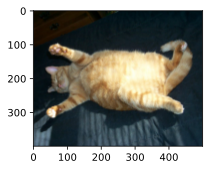

In [1]:
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

d2l.set_figsize()
img = d2l.Image.open('../img/cat1.jpg')
d2l.plt.imshow(img)

In [2]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    ''' apply: 对img使用 aug方法，并且生成 rxl个图片 scale缩放倍数'''
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

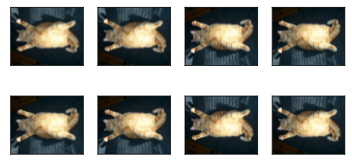

In [3]:
apply(img, torchvision.transforms.RandomVerticalFlip())

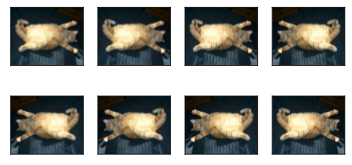

In [4]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

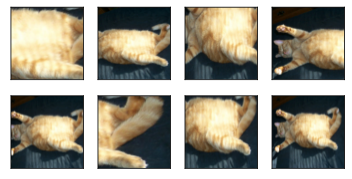

In [5]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

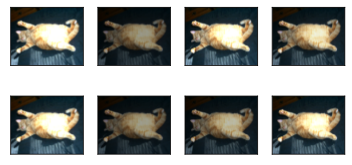

In [6]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

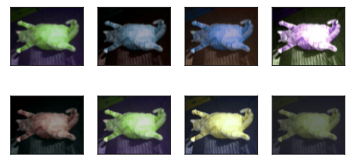

In [11]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

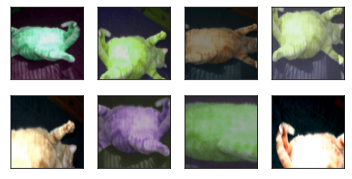

In [12]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)